In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [153]:
df = pd.read_csv('datos_seguro.csv')
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [154]:
df.describe()

,edad,compra
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


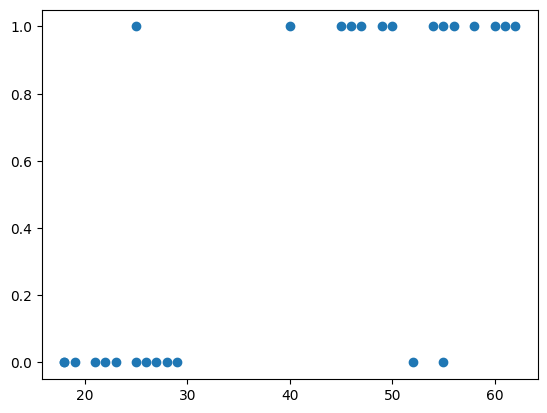

In [155]:
plt.scatter(df['edad'], df['compra'])

In [156]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[['edad']], df['compra'], test_size=0.2)

In [157]:
X_prueba

,edad
2,47
6,55
7,60
19,18
1,25
25,54


In [158]:
modelo = LogisticRegression()
modelo.fit(X_entrena, y_entrena)

LogisticRegression()

In [159]:
modelo.score(X_prueba, y_prueba)

0.8333333333333334

In [160]:
datos_nuevos = pd.DataFrame({'edad': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]})
datos_nuevos.head()

,edad
0,20
1,25
2,30
3,35
4,40


In [161]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[0.93283806, 0.06716194],
       [0.86367801, 0.13632199],
       [0.74292664, 0.25707336],
       [0.56863676, 0.43136324],
       [0.37550931, 0.62449069],
       [0.21524449, 0.78475551],
       [0.11119997, 0.88880003],
       [0.05398835, 0.94601165],
       [0.02537147, 0.97462853],
       [0.01173499, 0.98826501]])

In [162]:
prob_compra = probabilidades[:, 1]
prob_compra

array([0.06716194, 0.13632199, 0.25707336, 0.43136324, 0.62449069,
       0.78475551, 0.88880003, 0.94601165, 0.97462853, 0.98826501])

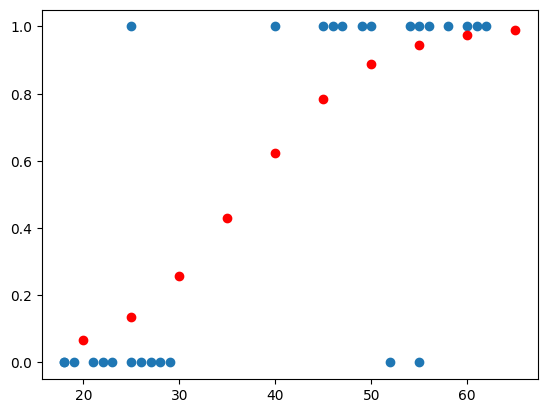

In [163]:
plt.scatter(df['edad'], df['compra'])
plt.scatter(datos_nuevos['edad'], prob_compra, color='red')